In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import svm

### Create data set

### Lets use 20 observations with two classes
#### Complete independent classes

In [3]:
X0 = np.random.normal(0, 1, (20, 2))  #create a random values array, mean=0, stddev=1, size=20*2
X0

array([[-1.02999341, -0.19705285],
       [-0.10788389, -0.80466738],
       [-0.88159253, -0.59866794],
       [-0.8884307 , -0.26407617],
       [ 0.35381492, -1.67665672],
       [ 0.13524459,  0.71130081],
       [-0.48963495,  0.63761886],
       [ 1.05095318,  0.86136763],
       [-0.17971637, -0.59725422],
       [-0.93155549, -0.88237589],
       [-0.22439105,  0.46860086],
       [ 0.04137992, -0.03482672],
       [ 0.73404839,  0.47295498],
       [ 0.52879305, -0.62395735],
       [ 0.7377449 ,  0.3408244 ],
       [-1.03333605, -1.27593512],
       [ 0.57975568,  0.31962278],
       [ 1.34083555,  1.32017708],
       [ 0.17260363,  0.46460201],
       [-0.73120859,  0.73469875]])

In [4]:
y0 = np.concatenate((
    np.full(10, -1), 
    np.full(10, 1)
))
y0

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [5]:
X0[y0==1,] = X0[y0==1,] + 5/2
X0

array([[-1.02999341, -0.19705285],
       [-0.10788389, -0.80466738],
       [-0.88159253, -0.59866794],
       [-0.8884307 , -0.26407617],
       [ 0.35381492, -1.67665672],
       [ 0.13524459,  0.71130081],
       [-0.48963495,  0.63761886],
       [ 1.05095318,  0.86136763],
       [-0.17971637, -0.59725422],
       [-0.93155549, -0.88237589],
       [ 2.27560895,  2.96860086],
       [ 2.54137992,  2.46517328],
       [ 3.23404839,  2.97295498],
       [ 3.02879305,  1.87604265],
       [ 3.2377449 ,  2.8408244 ],
       [ 1.46666395,  1.22406488],
       [ 3.07975568,  2.81962278],
       [ 3.84083555,  3.82017708],
       [ 2.67260363,  2.96460201],
       [ 1.76879141,  3.23469875]])

In [6]:
dat0 = pd.DataFrame(np.column_stack((X0,y0)))
dat0


,0,1,2
0,-1.029993,-0.197053,-1.0
1,-0.107884,-0.804667,-1.0
2,-0.881593,-0.598668,-1.0
3,-0.888431,-0.264076,-1.0
4,0.353815,-1.676657,-1.0
5,0.135245,0.711301,-1.0
6,-0.489635,0.637619,-1.0
7,1.050953,0.861368,-1.0
8,-0.179716,-0.597254,-1.0
9,-0.931555,-0.882376,-1.0


In [7]:
dat0[2] = dat0[2].astype('category')
dat0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       20 non-null     float64 
 1   1       20 non-null     float64 
 2   2       20 non-null     category
dtypes: category(1), float64(2)
memory usage: 564.0 bytes


## Plot data

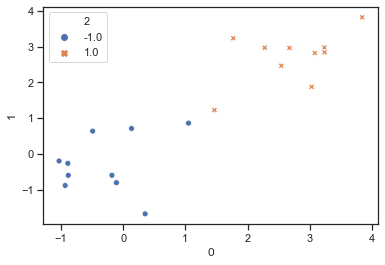

In [8]:
plt.style.use('seaborn-pastel')
sns.set(style="ticks")

ax = sns.scatterplot(x=0, y=1, hue=2, style=2, data=dat0)

# 1. Maximal Margin Classifier

### Simple Linear Support Vector Machine

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
from sklearn.svm import LinearSVC, SVC

In [10]:
svm_0 = LinearSVC(random_state=0, tol=1e-5)  #tol = tolerance for stopping criteria.
svm_0.fit(dat0.iloc[:,:2], dat0.iloc[:,-1])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

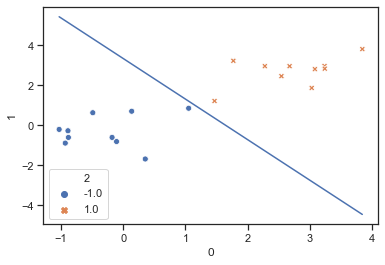

In [11]:
ax = sns.scatterplot(x=0, y=1, hue=2, style=2, data=dat0)

# Create the hyperplane
w = svm_0.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(dat0[0]), max(dat0[0]))
yy = a * xx - (svm_0.intercept_[0]) / w[1]

ax = plt.plot(xx, yy)

# 2. Support Vector Classifier

### Lets use 20 observations with two classes
#### observations cannot be completely separated

In [12]:
X1 = np.random.normal(0, 1, (20, 2))  #create a random values array, mean=0, stddev=1, size=20*2
X1

array([[-2.40386059,  0.19610518],
       [ 1.29883917,  0.26937992],
       [-1.56323852,  1.83649643],
       [ 1.03548821, -0.92361534],
       [-2.60504147,  1.07994676],
       [-1.06744351,  0.45297279],
       [ 0.95794944, -0.21499934],
       [ 0.05121185,  0.03996696],
       [ 0.70115713, -0.89450204],
       [ 0.02882514, -2.1803509 ],
       [-0.68672366, -0.47892291],
       [-1.75135773,  0.13518816],
       [-0.5513832 , -1.07777992],
       [-1.1644851 ,  0.05104247],
       [ 0.08602395,  0.28859351],
       [-0.63439317,  0.75862888],
       [-0.64111634,  0.10996643],
       [-0.82041527,  0.66419439],
       [-0.34971006, -0.09354071],
       [ 0.57052838,  0.73064819]])

In [13]:
y1 = np.concatenate((
    np.full(10, -1), 
    np.full(10, 1)
))
y1

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [14]:
X1[y1==1,] = X1[y1==1,] + 1
X1

array([[-2.40386059,  0.19610518],
       [ 1.29883917,  0.26937992],
       [-1.56323852,  1.83649643],
       [ 1.03548821, -0.92361534],
       [-2.60504147,  1.07994676],
       [-1.06744351,  0.45297279],
       [ 0.95794944, -0.21499934],
       [ 0.05121185,  0.03996696],
       [ 0.70115713, -0.89450204],
       [ 0.02882514, -2.1803509 ],
       [ 0.31327634,  0.52107709],
       [-0.75135773,  1.13518816],
       [ 0.4486168 , -0.07777992],
       [-0.1644851 ,  1.05104247],
       [ 1.08602395,  1.28859351],
       [ 0.36560683,  1.75862888],
       [ 0.35888366,  1.10996643],
       [ 0.17958473,  1.66419439],
       [ 0.65028994,  0.90645929],
       [ 1.57052838,  1.73064819]])

In [15]:
dat1 = pd.DataFrame(np.column_stack((X1,y1)))
dat1

,0,1,2
0,-2.403861,0.196105,-1.0
1,1.298839,0.269380,-1.0
2,-1.563239,1.836496,-1.0
3,1.035488,-0.923615,-1.0
4,-2.605041,1.079947,-1.0
5,-1.067444,0.452973,-1.0
6,0.957949,-0.214999,-1.0
7,0.051212,0.039967,-1.0
8,0.701157,-0.894502,-1.0
9,0.028825,-2.180351,-1.0


In [16]:
dat1[2] = dat1[2].astype('category')
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       20 non-null     float64 
 1   1       20 non-null     float64 
 2   2       20 non-null     category
dtypes: category(1), float64(2)
memory usage: 564.0 bytes


## Plot data

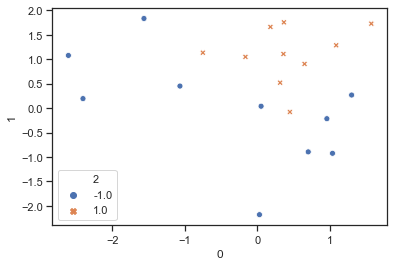

In [17]:
plt.style.use('seaborn-pastel')
sns.set(style="ticks")

ax = sns.scatterplot(x=0, y=1, hue=2, style=2, data=dat1)

In [18]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
from sklearn.svm import LinearSVC

In [19]:
svm_1 = LinearSVC(random_state=0, tol=1e-5, C=10)  #tol = tolerance for stopping criteria.
svm_1.fit(dat1.iloc[:,:2], dat1.iloc[:,-1])

/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

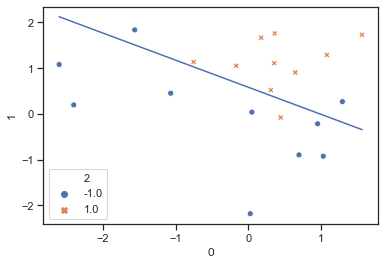

In [20]:
ax = sns.scatterplot(x=0, y=1, hue=2, style=2, data=dat1)

# Create the hyperplane
w = svm_1.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(dat1[0]), max(dat1[0]))
yy = a * xx - (svm_1.intercept_[0]) / w[1]

ax = plt.plot(xx, yy)

Find the best options for parameters

In [21]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix

parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.001, 0.01, 0.1, 1, 5, 10, 100]}
svr = svm.SVC()
grid = GridSearchCV(svr, parameters)
grid.fit(dat1.iloc[:,:2], dat1.iloc[:,-1])
predicted = grid.predict(dat1.iloc[:,:2])
cnf_matrix = confusion_matrix(dat1.iloc[:,-1], predicted)
print(cnf_matrix)


[[10  0]
 [ 1  9]]


In [22]:
grid.cv_results_

{'mean_fit_time': array([0.00258536, 0.00205393, 0.00208898, 0.00207043, 0.00183535,
        0.00217214, 0.00198817, 0.00235081, 0.00201807, 0.00203114,
        0.00200815, 0.00190215, 0.00195212, 0.00196662]),
 'std_fit_time': array([0.00095953, 0.00029874, 0.00046582, 0.00027697, 0.00018826,
        0.0005246 , 0.00023881, 0.00060679, 0.00033797, 0.00022253,
        0.00033777, 0.00031934, 0.00025021, 0.00042533]),
 'mean_score_time': array([0.00119662, 0.00098543, 0.00109949, 0.00108271, 0.00096197,
        0.00116153, 0.00092411, 0.00111113, 0.00098767, 0.00094132,
        0.00111604, 0.00108852, 0.00104566, 0.00110741]),
 'std_score_time': array([3.17096423e-04, 9.02281749e-05, 2.01860077e-04, 1.96759410e-04,
        9.91270252e-05, 3.11814803e-04, 2.11584796e-04, 3.24918589e-04,
        1.25526565e-04, 1.15560715e-04, 1.69235278e-04, 2.50763697e-04,
        2.17244330e-04, 2.86546299e-04]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 5, 5, 10, 10,
   

In [24]:
grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Find the best values for parameters...

In [25]:
grid.best_params_

{'C': 10, 'kernel': 'rbf'}

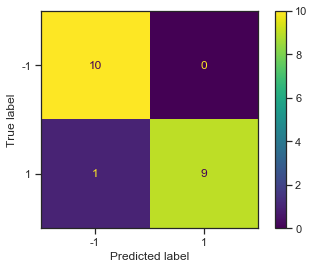

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cnf_matrix, ['-1', '1']).plot()


# 3. Support Vector Classifier

### Lets use 20 observations with two classes
#### observations are not linearly separable and aren't all clustered into single groups.

In [27]:
X2 = np.random.normal(0, 1, (200, 2))  #create a random values array, mean=0, stddev=1, size=20*2
X2[0:5,:]


array([[ 0.61794308, -0.7495779 ],
       [-1.56891689, -0.28398165],
       [-0.07943604,  1.92746946],
       [ 0.00944729, -0.15604997],
       [-0.05009839, -0.97852928]])

In [28]:
X2[0:100,:] = X2[0:100,:] + 2.5
X2[100:150,:] = X2[100:150,:] - 2.5

In [29]:
y2 = np.concatenate((
    np.full(150, 1), 
    np.full(50, 2)
))
y2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [30]:
dat2 = pd.DataFrame(np.column_stack((X2,y2)))
dat2

,0,1,2
0,3.117943,1.750422,1.0
1,0.931083,2.216018,1.0
2,2.420564,4.427469,1.0
3,2.509447,2.343950,1.0
4,2.449902,1.521471,1.0
...,...,...,...
195,0.298304,-0.325682,2.0
196,0.005989,1.611183,2.0
197,-1.303390,-1.368779,2.0
198,-0.410601,-0.920502,2.0


In [31]:
dat2[2] = dat2[2].astype('category')
dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       200 non-null    float64 
 1   1       200 non-null    float64 
 2   2       200 non-null    category
dtypes: category(1), float64(2)
memory usage: 3.5 KB


## Plot data

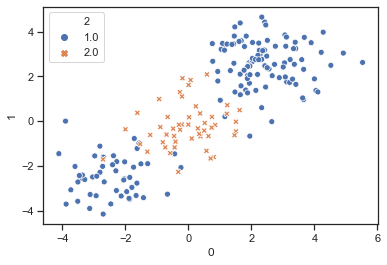

In [32]:
plt.style.use('seaborn-pastel')
sns.set(style="ticks")

ax = sns.scatterplot(x=0, y=1, hue=2, style=2, data=dat2)

## Create training set (sample = 100)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dat2.iloc[:,:-1], 
                                                    dat2.iloc[:,-1],
                                                    test_size=100,     #float between 0.0 and 1.0=percentage, integer=quantity 
                                                    random_state=42)

Fit the non-linear model to the training data using the radial kernel

In [34]:
from sklearn.svm import NuSVC

In [35]:
svm_2 = NuSVC(random_state=0, tol=1e-5, gamma = .5)  #tol = tolerance for stopping criteria.
svm_2.fit(X_train, y_train)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=0, shrinking=True,
      tol=1e-05, verbose=False)

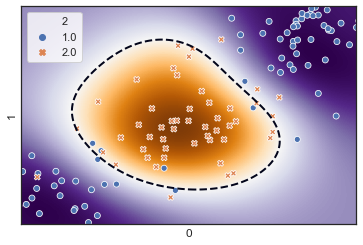

In [36]:
# plot the decision function for each datapoint on the grid
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

Z = svm_2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
sns.scatterplot(x=0, y=1, hue=2, style=2, data=dat2)
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

Tune the non-linear model to find the best gamma value

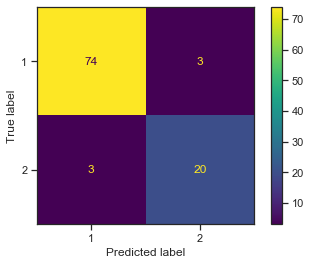

In [37]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix

parameters = {'gamma':[0.5, 1, 2, 3, 4]}
svr = NuSVC(random_state=0, tol=1e-5)
grid = GridSearchCV(svr, parameters)
grid.fit(X_train, y_train)
predicted = grid.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predicted)

ConfusionMatrixDisplay(cnf_matrix, ['1', '2']).plot()


In [38]:
grid.best_params_

{'gamma': 0.5}

In [39]:
grid.best_estimator_

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=0, shrinking=True,
      tol=1e-05, verbose=False)

Model performance

In [40]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score

In [41]:
accuracy_score(y_test, predicted)

0.94

In [42]:
cohen_kappa_score(y_test, predicted)

0.8306041784302653

In [43]:
precision_score(y_test, predicted)

#The precision is the ratio tp / (tp + fp) where tp is the number of true positives 
#and fp the number of false positives. 
#The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

0.961038961038961

# 4. Support Vector Classifier - Multiple Classes

Add dataset (n=50) to have three classes instead of two.

In [44]:
X3 = np.concatenate((X2, np.random.normal(0, 1, (50, 2))), axis=0)
#np.random.normal(0, 1, (50, 2))  #create a random values array, mean=0, stddev=1, size=20*2
X3.shape
X3[0:5,:]


array([[3.11794308, 1.7504221 ],
       [0.93108311, 2.21601835],
       [2.42056396, 4.42746946],
       [2.50944729, 2.34395003],
       [2.44990161, 1.52147072]])

In [45]:
y3 = np.concatenate((y2, (np.full(50, 0))), axis=0)
y3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
X3[[y3==0]][:,-1] = X3[[y3==0]][:,-1] + 2.5


/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


In [47]:
dat3 = pd.DataFrame(np.column_stack((X3,y3)))
dat3

,0,1,2
0,3.117943,1.750422,1.0
1,0.931083,2.216018,1.0
2,2.420564,4.427469,1.0
3,2.509447,2.343950,1.0
4,2.449902,1.521471,1.0
...,...,...,...
245,-0.366306,-0.259367,0.0
246,1.952167,-0.271595,0.0
247,0.411971,-0.214360,0.0
248,0.409677,0.582381,0.0


In [48]:
dat3[2] = dat3[2].astype('category')
dat3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       250 non-null    float64 
 1   1       250 non-null    float64 
 2   2       250 non-null    category
dtypes: category(1), float64(2)
memory usage: 4.4 KB


## Plot data

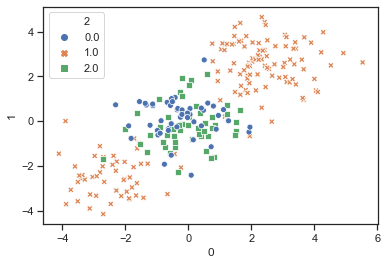

In [49]:
plt.style.use('seaborn-pastel')
sns.set(style="ticks")

ax = sns.scatterplot(x=0, y=1, hue=2, style=2, data=dat3)

In [50]:
from sklearn.svm import SVC

In [51]:

svm_3 = SVC(random_state=0, tol=1e-5, gamma = .7, C=1)  #tol = tolerance for stopping criteria.
svm_3.fit(dat3.iloc[:,:-1], dat3.iloc[:,-1])

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=1e-05,
    verbose=False)

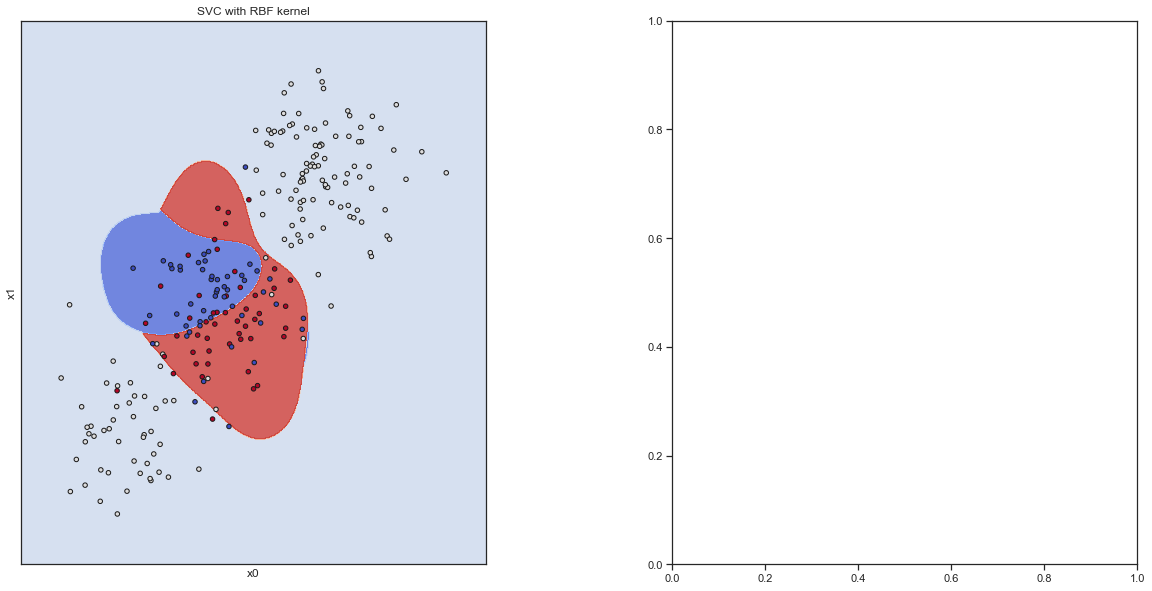

In [52]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


X = dat3.iloc[:,:-1]
y = dat3.iloc[:,-1]

C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='rbf', gamma=0.7, C=C),
          )
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with RBF kernel',
          )

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1,2, figsize=(20,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

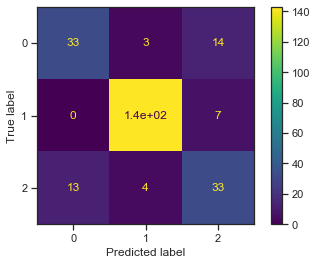

In [53]:
cnf_matrix = confusion_matrix(y, svm_3.predict(X))
ConfusionMatrixDisplay(cnf_matrix, [0, 1, 2]).plot()

In [54]:
accuracy_score(y, svm_3.predict(X))

0.836

In [55]:
cohen_kappa_score(y, svm_3.predict(X))

0.7071428571428571

Support vectors

In [56]:
svm_3.support_vectors_

array([[-8.67921194e-01,  1.45050729e-02],
       [-9.84884509e-01, -4.22234834e-01],
       [-6.33937064e-01, -3.38956640e-01],
       [-1.89661359e+00, -2.14852794e-01],
       [ 1.27172140e+00,  1.01380433e-02],
       [-1.21853757e+00, -1.86006306e-01],
       [ 7.91807682e-01,  6.70631238e-01],
       [ 4.96811741e-02,  2.94964918e-01],
       [ 1.74377007e-01, -3.17326137e-02],
       [-9.66709918e-01, -6.22938153e-01],
       [ 8.80697848e-01, -3.63386044e-01],
       [ 1.92179148e+00, -4.89945383e-01],
       [ 8.78713299e-02, -2.41938215e+00],
       [-5.46181477e-01, -1.19239727e-01],
       [ 9.51566454e-01,  2.52229446e-01],
       [-5.44630366e-01, -1.52415164e+00],
       [ 1.11302028e+00,  5.12008745e-01],
       [-2.53307406e-01,  1.71259918e-01],
       [ 6.12943520e-01,  8.04719921e-01],
       [-7.61942350e-01, -1.92911989e+00],
       [ 1.54097841e-01, -8.37822259e-01],
       [ 4.75655852e-01,  4.82776720e-01],
       [-2.31160165e+00,  7.25300610e-01],
       [-8.

Make predictions using the trained model

In [57]:
svm_3.predict(X3)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 0.,
       0., 2., 2., 1., 2., 2., 2., 2., 2., 2., 0., 2., 0., 0., 0., 2., 2.,
       0., 2., 2., 2., 2., 0., 0., 0., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
       1., 2., 2., 0., 2., 0., 0., 2., 2., 2., 1., 2., 2., 0., 0., 0., 0.,
       2., 0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 2., 1., 0., 0., 2., 0.,
       0., 2., 2., 0., 0.

Compare the distribution of actual vs predicted values

In [58]:
y.value_counts()


1.0    150
2.0     50
0.0     50
Name: 2, dtype: int64

In [59]:
pd.Series(svm_3.predict(X3)).value_counts()

1.0    150
2.0     54
0.0     46
dtype: int64